# Store range effect in purchase

In this notebook we explore a data set of customers and its purchases in different stores

In [1]:
# https://bigml.com/user/czuriaga/gallery/dataset/5559c2c6200d5a6570000084#info
# http://www.michelecoscia.com/?page_id=379
# Lift in data mining
# https://en.wikipedia.org/wiki/Lift_(data_mining)

Import needed libraries

In [2]:
import pandas as pd
import os
import numpy as np

import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.cross_validation import train_test_split

Read data, drop NA's and get number of records (customers)

In [3]:
data = pd.read_csv('data.csv')
data = data.dropna()
num_customers = data.shape[0]

In [4]:
data.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090,473,7551.701,14.221659,3.150493,2,...,10.441143,14.862848,0.000000,0,0.000000,6.393403,2.600485,0.000000,0,0.000000
1,2,909.76764,254.94832,2295.4840,4508,486,7820.219,11.235947,2.191422,4,...,3.761943,4.848720,2.546600,0,16.479185,2.851152,2.009863,2.059450,0,2.103394
2,3,1498.94700,754.29560,2831.7727,814,234,1788.613,5.453088,2.258994,4,...,3.757062,5.605183,1.923385,0,5.924268,3.426687,2.478529,1.923385,0,1.947067
3,4,561.65900,362.79178,2210.3820,648,208,1679.520,5.976940,2.614292,4,...,4.997400,2.688400,5.029184,0,7.156351,4.997400,2.688400,2.083168,0,2.754427
4,5,605.36280,275.46753,1375.1184,13,10,17.922,1.792200,1.692000,2,...,0.000000,0.967667,2.145571,0,0.000000,0.000000,0.633667,2.145571,0,0.000000


In [5]:
data.columns.values

array(['customer_id', 'avg_distance_to_shops', 'min_distance_to_shops',
       'max_distance_to_shops', 'products_purchased',
       'unique_products_purchased', 'amount_purchased', 'avg_purchase',
       'avg_price', 'shops_used', 'distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5',
       'products_purchased_shop_1', 'products_purchased_shop_2',
       'products_purchased_shop_3', 'products_purchased_shop_4',
       'products_purchased_shop_5', 'unique_products_purchased_shop_1',
       'unique_products_purchased_shop_2',
       'unique_products_purchased_shop_3',
       'unique_products_purchased_shop_4',
       'unique_products_purchased_shop_5', 'amount_purchased_shop_1',
       'amount_purchased_shop_2', 'amount_purchased_shop_3',
       'amount_purchased_shop_4', 'amount_purchased_shop_5',
       'avg_purchase_shop_1', 'avg_purchase_shop_2', 'avg_purchase_shop_3',
       'avg_purchase_shop_4', 'avg_purchase_shop_5', 'avg_price_sho

Let's get the distribution of average purchases in store according to shops (in this case five stores)

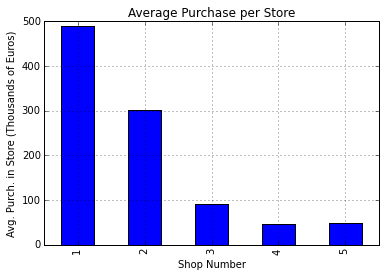

In [6]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_purchase_shop_' + str(k)
    aux_ = data[text_].sum()/1000.
    #print k , aux_
    list_purchase.append(aux_)
dfAux = pd.DataFrame()
dfAux['Store Number'] = [1,2,3,4,5]
dfAux['Avg. Purchase in Shop'] = list_purchase

dfAux.plot(x='Store Number',y='Avg. Purchase in Shop',kind='bar',
           title='Average Purchase per Store',legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Avg. Purch. in Store (Thousands of Euros)')
plt.show()

Now distribution of customers according to the number of shops they use when they purchase

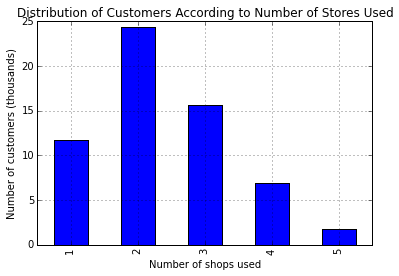

In [7]:
list_purchase = []
for k in range(1,6):
    #text_ = 'avg_purchase_shop_' + str(k)
    aux_ = sum(data['shops_used']== k)
    #perc_ = (float(aux_)/float(num_customers))*100
    perc_ = float(aux_/1000.)
    #print k , perc_
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Number of Shops Used'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase

dfAux.plot(x='Number of Shops Used',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Number of Stores Used',
           legend=False,grid=True)
plt.xlabel('Number of shops used ')
plt.ylabel('Number of customers (thousands)')
plt.show()

Distribution of customers according to the shop number

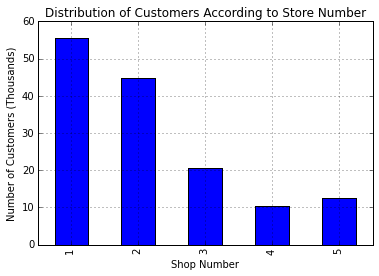

In [8]:
list_purchase = []
for k in range(1,6):
    text_ = 'avg_price_shop_' + str(k)
    aux_ = sum(data[text_] <> 0)
    #perc_ = aux_/float(num_customers)*100
    perc_ = float(sum(data[text_] <> 0)/1000.)
    #print k , perc_
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Number of Customers'] = list_purchase


dfAux.plot(x='Shop Number',y='Number of Customers',kind='bar',
           title='Distribution of Customers According to Store Number',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of Customers (Thousands)')
plt.show()



In what follows we will add to our data frame two columns. One of them will indicate the number of store that is closest to customer and the otherone indicating what is the farthest. 

In [9]:
data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].head()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5
0,4082.5222,985.8762,2372.09700,4929.8047,3284.38670
1,1115.3433,2295.4840,670.90080,2048.0605,254.94832
2,1418.8348,2831.7727,1286.81900,1545.1963,754.29560
3,1104.3829,2210.3820,617.28710,2181.6853,362.79178
4,1913.7630,1375.1184,275.46753,2961.3035,1172.37730


In [10]:
dist_ = data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5']].values

In [11]:
closest = []
farthest = []
for k in range(num_customers):
    Min = 1 + dist_[k,:].argmin()
    Max = 1 + dist_[k,:].argmax()
    closest.append(Min)
    farthest.append(Max)
data['closest_shop'] = closest
data['farthest_shop'] = farthest

In [12]:
data[['distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5','closest_shop',
      'farthest_shop']].head()

,distance_shop_1,distance_shop_2,distance_shop_3,distance_shop_4,distance_shop_5,closest_shop,farthest_shop
0,4082.5222,985.8762,2372.09700,4929.8047,3284.38670,2,4
1,1115.3433,2295.4840,670.90080,2048.0605,254.94832,5,2
2,1418.8348,2831.7727,1286.81900,1545.1963,754.29560,5,2
3,1104.3829,2210.3820,617.28710,2181.6853,362.79178,5,2
4,1913.7630,1375.1184,275.46753,2961.3035,1172.37730,3,4


We now see distribution of customers according to closeness to store

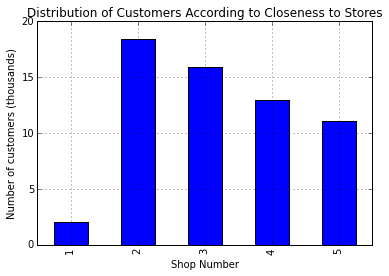

In [13]:
list_purchase = []
for k in range(1,6):
    aux_ = sum(data['closest_shop'] == k)
    #perc_ = aux_/float(num_customers)*100
    perc_ = float(aux_/1000.)
    #print k , perc_
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Customers Closest to Store'] = list_purchase


dfAux.plot(x='Shop Number',y='Customers Closest to Store',kind='bar',
           title='Distribution of Customers According to Closeness to Stores',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of customers (thousands)')
plt.show()


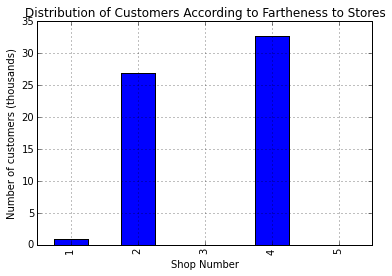

In [14]:
list_purchase = []
for k in range(1,6):
    aux_ = sum(data['farthest_shop'] == k)
    #perc_ = aux_/float(num_customers)*100
    perc_ = float(aux_/1000.)
    #print k , perc_
    list_purchase.append(perc_)
dfAux = pd.DataFrame()
dfAux['Shop Number'] = [1,2,3,4,5]
dfAux['Customers Farthest to Store'] = list_purchase


dfAux.plot(x='Shop Number',y='Customers Farthest to Store',kind='bar',
           title='Distribution of Customers According to Fartheness to Stores',
           legend=False,grid=True)
plt.xlabel('Shop Number')
plt.ylabel('Number of customers (thousands)')
plt.show()


Let's now get auxiliary data frames related with customers that purschased ONLY in each individual store

In [21]:
# Data frame for users who purchased ONLY in shop 1
df1 = data[(data.amount_purchased_shop_2 == 0.) & (data.amount_purchased_shop_3 == 0.) &
          (data.amount_purchased_shop_4 == 0.) & (data.amount_purchased_shop_5 == 0.)]
num_1 = df1.shape[0]
close11 = sum(df1.closest_shop == 1)
close12 = sum(df1.closest_shop == 2)
close13 = sum(df1.closest_shop == 3)
close14 = sum(df1.closest_shop == 4)
close15 = sum(df1.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 2
df2 = data[(data.amount_purchased_shop_1 == 0.) & (data.amount_purchased_shop_3 == 0.) &
          (data.amount_purchased_shop_4 == 0.) & (data.amount_purchased_shop_5 == 0.)]
num_2 = df2.shape[0]
close21 = sum(df2.closest_shop == 1)
close22 = sum(df2.closest_shop == 2)
close23 = sum(df2.closest_shop == 3)
close24 = sum(df2.closest_shop == 4)
close25 = sum(df2.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 3
df3 = data[(data.amount_purchased_shop_1 == 0.) & (data.amount_purchased_shop_2 == 0.) &
          (data.amount_purchased_shop_4 == 0.) & (data.amount_purchased_shop_5 == 0.)]
num_3 = df3.shape[0]
close31 = sum(df3.closest_shop == 1)
close32 = sum(df3.closest_shop == 2)
close33 = sum(df3.closest_shop == 3)
close34 = sum(df3.closest_shop == 4)
close35 = sum(df3.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 4
df4 = data[(data.amount_purchased_shop_1 == 0.) & (data.amount_purchased_shop_2 == 0.) &
          (data.amount_purchased_shop_3 == 0.) & (data.amount_purchased_shop_5 == 0.)]
num_4 = df4.shape[0]
close41 = sum(df4.closest_shop == 1)
close42 = sum(df4.closest_shop == 2)
close43 = sum(df4.closest_shop == 3)
close44 = sum(df4.closest_shop == 4)
close45 = sum(df4.closest_shop == 5)


# Data frame for users who purchased ONLY in shop 5
df5 = data[(data.amount_purchased_shop_1 == 0.) & (data.amount_purchased_shop_2 == 0.) &
          (data.amount_purchased_shop_3 == 0.) & (data.amount_purchased_shop_4 == 0.)]
num_5 = df5.shape[0]
close51 = sum(df5.closest_shop == 1)
close52 = sum(df5.closest_shop == 2)
close53 = sum(df5.closest_shop == 3)
close54 = sum(df5.closest_shop == 4)
close55 = sum(df5.closest_shop == 5)



We check consistency with our initial data frame

In [22]:
print num_1 + num_2 + num_3 + num_4 + num_5
print sum(data.shops_used == 1)

11710
11710


Let's see distribution of customers who purchased ONLY in one store and how many of them where closest to THAT particular store

In [32]:
del df_close
one_store = [num_1,num_2,num_3,num_4,num_5]
closest_to_1 = [close11,close21,close31,close41,close51]
closest_to_2 = [close12,close22,close32,close42,close52]
closest_to_3 = [close13,close23,close33,close43,close53]
closest_to_4 = [close14,close24,close34,close44,close54]
closest_to_5 = [close15,close25,close35,close45,close55]

df_close = pd.DataFrame()
df_close['Total customers'] = one_store
df_close['Closest to 1'] = closest_to_1
df_close['Closest to 2'] = closest_to_2
df_close['Closest to 3'] = closest_to_3
df_close['Closest to 4'] = closest_to_4
df_close['Closest to 5'] = closest_to_5
df_close.index = range(1,6)


In [33]:
df_close

,Total customers,Closest to 1,Closest to 2,Closest to 3,Closest to 4,Closest to 5
1,7987,445,1019,1557,3112,1854
2,2470,18,1506,519,196,231
3,449,10,18,338,36,47
4,478,4,9,19,426,20
5,326,24,16,19,27,240


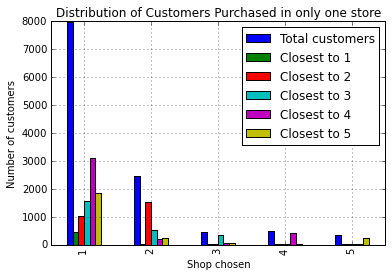

In [35]:
df_close.plot(kind='bar',
           title='Distribution of Customers Purchased in only one store',grid=True)
plt.xlabel('Shop chosen')
plt.ylabel('Number of customers')
plt.show()

In [20]:
quartiles = np.percentile(data.amount_purchased.values,np.arange(0,100,25))
quartiles

array([  2.12000000e-01,   6.53107000e+02,   2.35513800e+03,
         6.05463100e+03])